In [11]:
%load_ext autoreload
%autoreload 2
import numpy as np
from jax import config
config.update("jax_enable_x64", True)
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
np.random.seed(0)

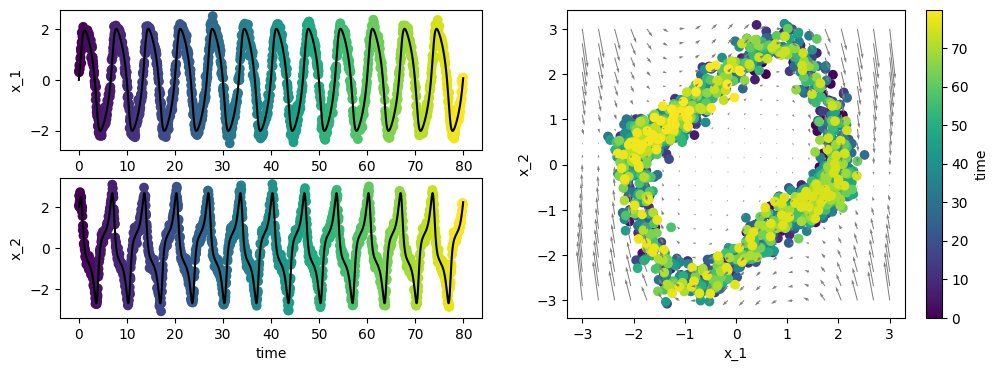

In [12]:

def vanderpol(x, t, mu=1):
    x, y = x[..., 0], x[..., 1]
    return np.array([y, mu * (1 - x ** 2) * y - x])

x0 = np.array([0, 2.])
time = np.arange(0, 80, .05)
x_mu = odeint(vanderpol, x0, time)
x_data = x_mu + np.random.randn(*x_mu.shape) * .2
x_mesh = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))
x_mesh = np.stack([x_mesh[0].flatten(), x_mesh[1].flatten()], axis=-1)

dx_mesh = vanderpol(x_mesh, 0)

plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.plot(time, x_mu[:, 0], 'k')
plt.scatter(time, x_data[:, 0], c=time)
plt.ylabel('x_1')
plt.subplot(2, 2, 3)
plt.plot(time, x_mu[:, 1], 'k')
plt.scatter(time, x_data[:, 1], c=time)
plt.ylabel('x_2')
plt.xlabel('time')
plt.subplot(1, 2, 2)
plt.scatter(x_data[:, 0], x_data[:, 1], c=time)
plt.colorbar(label='time')
plt.quiver(x_mesh[:, 0], x_mesh[:, 1], dx_mesh[0], dx_mesh[1], color='gray')
plt.ylabel('x_2')
plt.xlabel('x_1')
plt.show()

In [13]:
# import numpy as np

# # Convert Cartesian (x1, x2) to Polar (r, theta)
# r = np.sqrt(x_data[:, 0]**2 + x_data[:, 1]**2)  
# theta = np.arctan2(x_data[:, 1], x_data[:, 0]) 


# x_data_new = np.column_stack((r, theta))

# print("Original shape:", x_data.shape)
# print("New shape (r, θ):", x_data_new.shape)


In [14]:
# print(x_data_new[10])

In [15]:



# time_series = x_data_new  # Replace with actual data
# r_values = time_series[:, 0]
# theta_values = time_series[:, 1]

# # Create time indices
# time = np.arange(len(r_values))

# # Create figure
# plt.figure(figsize=(10, 5), dpi=150)

# # Subplot 1: Plot r over time with data points
# plt.subplot(2, 1, 1)
# plt.plot(time, r_values, color="blue", label="r (radius)", linewidth=1)
# plt.scatter(time, r_values, color="blue", s=10, alpha=0.6)  # Data points
# plt.ylabel("Radius (r)")
# plt.legend()
# plt.grid(True, linestyle=":", linewidth=0.5, alpha=0.6)

# # Subplot 2: Plot θ over time with data points
# plt.subplot(2, 1, 2)
# plt.plot(time, theta_values, color="red", label="θ (angle)", linewidth=1)
# plt.scatter(time, theta_values, color="red", s=10, alpha=0.6)  # Data points
# plt.xlabel("Time")
# plt.ylabel("Angle (θ)")
# plt.legend()
# plt.grid(True, linestyle=":", linewidth=0.5, alpha=0.6)

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()

In [16]:
# import matplotlib.pyplot as plt


# data = x_data_new


# r_values = [point[0] for point in data]
# theta_values = [point[1] for point in data]


# time_steps = range(len(data))
# colors = plt.cm.plasma([t / max(time_steps) for t in time_steps])  # Cooler to warmer colors

# # Plot in polar coordinates
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, polar=True)



# # Plot the lines connecting the points
# ax.plot(theta_values, r_values, color='gray', alpha=0.5, linestyle='--', label="Trajectory")

# # Plot the scatter points
# scatter = ax.scatter(theta_values, r_values, c=time_steps, cmap='plasma', edgecolor='k', s=50)
# # 
# # Add a colorbar to indicate time evolution
# cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
# cbar.set_label('Time Step', fontsize=12)

# # Set plot title
# ax.set_title('Time Evolution in Polar Coordinates', fontsize=14)
# ax.legend(loc="upper left")

# # plt.show()


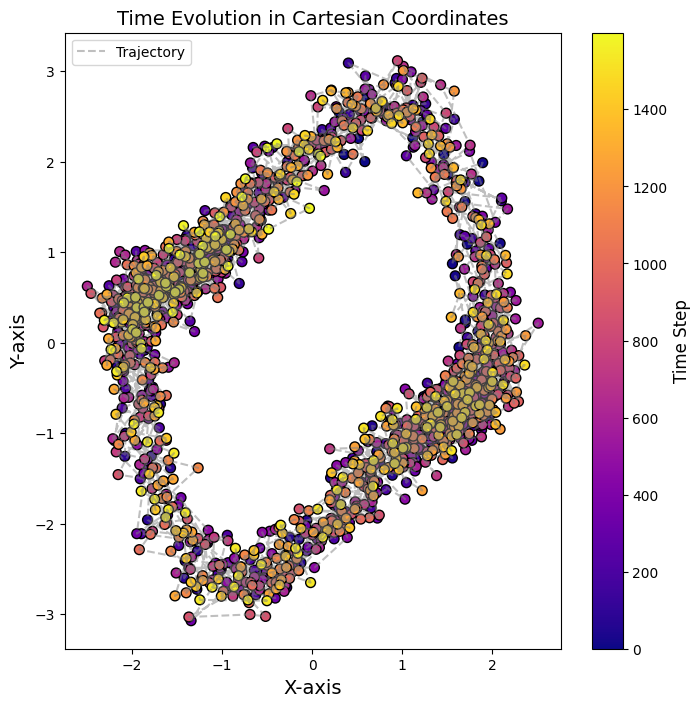

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample x, y time series data (Replace with actual data)
data = x_data  # Assuming x_y_data is in (x, y) format

x_values = [point[0] for point in data]
y_values = [point[1] for point in data]

time_steps = range(len(data))
colors = plt.cm.plasma([t / max(time_steps) for t in time_steps])  # Cooler to warmer colors

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot trajectory as a dashed line
ax.plot(x_values, y_values, color='gray', alpha=0.5, linestyle='--', label="Trajectory")

# Scatter plot of data points
scatter = ax.scatter(x_values, y_values, c=time_steps, cmap='plasma', edgecolor='k', s=50)

# Add a colorbar to indicate time evolution
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Time Step', fontsize=12)

# Set plot title and labels
ax.set_xlabel("X-axis", fontsize=14)
ax.set_ylabel("Y-axis", fontsize=14)
ax.set_title("Time Evolution in Cartesian Coordinates", fontsize=14)
ax.legend(loc="upper left")

plt.show()


In [18]:
from timeseries_models import state_model, observation_model, state_space_model

Dz_tut = 2
Dk_tut = 5
Dx_tut = x_data.shape[-1]

sm_tut = state_model.LSEMStateModel(Dz_tut, Dk_tut)
om_tut = observation_model.LinearObservationModel(Dx_tut, Dz_tut)
ssm = state_space_model.StateSpaceModel(om_tut, sm_tut)
llk_list, p0_dict, smooth_dict, two_step_smooth_dict = ssm.fit(x_data)


Iteration 1 - Log likelihood=-3987.2
Iteration 2 - Log likelihood=-2911.1
Iteration 3 - Log likelihood=-1994.9
Iteration 4 - Log likelihood=-1235.5
Iteration 5 - Log likelihood=-640.2
Iteration 6 - Log likelihood=-224.5
Iteration 7 - Log likelihood=23.8
Iteration 8 - Log likelihood=152.5
Iteration 9 - Log likelihood=217.4
Iteration 10 - Log likelihood=254.7
Iteration 11 - Log likelihood=280.8
Iteration 12 - Log likelihood=302.0
Iteration 13 - Log likelihood=320.1
Iteration 14 - Log likelihood=336.6
Iteration 15 - Log likelihood=351.1
Iteration 16 - Log likelihood=364.4
Iteration 17 - Log likelihood=376.5
Iteration 18 - Log likelihood=387.8
Iteration 19 - Log likelihood=398.2
Iteration 20 - Log likelihood=408.0
Iteration 21 - Log likelihood=417.2
Iteration 22 - Log likelihood=425.9
Iteration 23 - Log likelihood=434.2
Iteration 24 - Log likelihood=442.1
Iteration 25 - Log likelihood=449.6
Iteration 26 - Log likelihood=456.8
Iteration 27 - Log likelihood=463.7
Iteration 28 - Log likelihoo

In [19]:
# horizon = 1
# prediction_steps = 300
# x_prediction = np.vstack([x_data, np.zeros((prediction_steps, Dx))])
# data_prediction_densities = ssm.predict(X=x_prediction, horizon=horizon, first_prediction_idx=x_data.shape[0]-1) 

In [20]:
# pred_time = np.arange(0, prediction_steps+1)
# upper = data_prediction_densities.mu + np.sqrt(data_prediction_densities.Sigma.diagonal(axis1=-2, axis2=-1))
# lower = data_prediction_densities.mu - np.sqrt(data_prediction_densities.Sigma.diagonal(axis1=-2, axis2=-1))

# dz = lambda z: ssm.sm.state_density.get_conditional_mu(z[None])[0] - z
# fp = fsolve(dz, np.zeros((1,2)))
# z_mesh = np.meshgrid(np.linspace(fp[0] - 3., fp[0] + 3.,20), np.linspace(fp[1]-3.,fp[1]+3.,20))
# z_mesh = np.stack([z_mesh[0].flatten(), z_mesh[1].flatten()], axis=-1)
# dz_pred = np.vstack([dz(z) for z in z_mesh])

# plt.figure(figsize=(16, 4))
# plt.subplot(2, 3, 1)
# plt.plot(data_prediction_densities.mu[:, 0], 'k')
# plt.fill_between(np.arange(data_prediction_densities.mu.shape[0]), upper[:, 0], lower[:, 0], alpha=.2)
# plt.ylabel('x_1')
# plt.subplot(2, 3, 4)
# plt.plot(data_prediction_densities.mu[:, 1], 'k')
# plt.fill_between(np.arange(data_prediction_densities.mu.shape[0]), upper[:, 1], lower[:, 1], alpha=.2)
# plt.xlabel('time steps')
# plt.ylabel('x_2')
# plt.subplot(1, 3, 2)
# plt.scatter(data_prediction_densities.mu[:, 0], data_prediction_densities.mu[:, 1], c=pred_time)
# plt.title('Observation space')
# plt.xlabel('x_1')
# plt.ylabel('x_2')
# plt.subplot(1, 3, 3)
# plt.quiver(z_mesh[:, 0], z_mesh[:, 1], dz_pred[:, 0], dz_pred[:, 1], color='gray')
# plt.scatter(fp[0], fp[1], c='C0')
# plt.xlabel('z_1')
# plt.ylabel('z_2')
# plt.title('Latent space')
# plt.show()

In [21]:
# import numpy
# X=x_data_new
# train_length=800
# p_x =ssm.predict(X=x_prediction, horizon=horizon, first_prediction_idx=x_data.shape[0]-1) 
# mu_lin = p_x.mu; #numpy.NaN*
# print('Check!!',numpy.shape(mu_lin))
# std_lin =  p_x.Sigma; #numpy.NaN*
# idx_pred = range(int(X.shape[0]*1/2),int(X.shape[0]))
# fig = plt.figure(figsize=(10,5))
# ax_list = [fig.add_subplot(Dx,1,1), fig.add_subplot(Dx,1,2)]
# def plot_prediction_linear(ax_list):
#     for ix in range(Dx):
#         #plt.subplot(Dx,1,ix+1)
#         ax = ax_list[ix]
        
#         # if ix == 0:
#         #     ax.set_title(r'Linear: Van der Pol oscillator ($\mu=%i$)' %mu_param)   
#         x_min = mu_lin[:,ix] - 1.96 * numpy.sqrt(std_lin[:,ix,ix]) #1.68
#         x_max = mu_lin[:,ix] + 1.96 * numpy.sqrt(std_lin[:,ix,ix])
        
#         ax.fill_between(range(train_length, X.shape[0]), x_min, x_max, color='C1', alpha=.5)
        
#         # Draw the data
#         ax.plot(X[:,ix],'k')
#         # Draw smoothing and prediction mean
#         #ax.plot(mu_lin[:,ix],'r')
        
#         # Draw filtering, prediction background
#         ymin, ymax = ax.get_ylim()
#         ax.fill_between(range(0,idx_pred[1]-1), ymin, ymax, color='y', alpha=.05)
#         ax.fill_between(idx_pred, ymin, ymax, color='r', alpha=.05)
    
#         # Labels    
#         ax.set_ylabel(r'$x_%d$' %(ix+1))
#         ax.set_xlim([0,X.shape[0]])
        
#     ax.set_xlabel('Time steps')
# plot_prediction_linear(ax_list)
# plt.show()




In [22]:
# mu=smooth_dict['mu'][0]
# plt.plot(mu[:,0],label='r')
# # plt.plot(mu[:,1],label='theta')
# plt.legend()

In [23]:
# np.shape(mu)

In [24]:
from jax import numpy as jnp
import numpy as np
from gaussian_toolbox import pdf,conditional,approximate_conditional
import matplotlib.pyplot as plt
import jax


In [25]:
A=sm_tut.A
b=sm_tut.b
W=sm_tut.W


Qz=sm_tut.Qz
# B=0
# B_u=jnp.array([[B,],[B,]])


In [26]:
C=om_tut.C
d=om_tut.d
Qx=om_tut.Qx

In [27]:
print(np.shape(A))

(2, 7)


In [28]:
# print(np.shape(B_u))

In [29]:
class state_model:
    def __init__(self,A,b,W,Qz):
        self.A=A
        self.B_u=np.zeros((2,1))
        self.b=b
        self.W=W
        self.Dz=np.shape(A)[0]
        self.Dk=np.shape(A)[1]-np.shape(A)[0]
        self.Dphi=np.shape(A)[1]
        self.Du=np.shape(self.B_u)[1]
        self.Qz =Qz
        self.density=approximate_conditional.LinearControlLSEMGaussianConditional(M=np.array([self.A,]),b=np.array([self.b,]),W=self.W,B_u=np.array([self.B_u,]),Sigma=np.array([self.Qz,]),num_cond_dim=self.Dz,num_control_dim=self.Du)
    def set_B_u(self,o_t,C,d):
        C_inv=np.linalg.inv(C)
        z_t=np.matmul(C_inv,o_t-d)
        theta=np.arctan(z_t[1]/z_t[0])
        B=0.7
        B_u=jnp.array([[B*np.cos(theta),],[B*np.sin(theta),]])
        
        # print(B_u)
        #made this change on 16/02/2025, was upadating only the density, not the parameter, B_u. Might have caused all issues!!
        self.B_u=B_u
        #do not exactly need the next line??
        self.density=approximate_conditional.LinearControlLSEMGaussianConditional(M=np.array([self.A,]),b=np.array([self.b,]),W=self.W,B_u=np.array([self.B_u,]),Sigma=np.array([self.Qz,]),num_cond_dim=self.Dz,num_control_dim=self.Du)
    def compute_z_t_plus_one(self,z_t,u_t):
        self.density.update_phi()
        phi_t=self.density.evaluate_phi(np.array(z_t)[None])[0]

        return np.matmul(self.A,phi_t)+np.matmul(self.B_u,u_t)+self.b+jnp.dot(jnp.linalg.cholesky(self.Qz), np.random.normal(size=((self.Qz).shape[0],)))
        

In [30]:
sm=state_model(A=A,b=b,W=W,Qz=Qz)

In [31]:
T=2000
state_list=[]
z_0=[1.5322986 , 0.42485871]
u_0=np.array([0])
state_list.append(z_0)
for i in range(T):
    z_t=state_list[-1]
    z_t_plus_1=sm.compute_z_t_plus_one(z_t,u_0)
    state_list.append(z_t_plus_1)
    
    

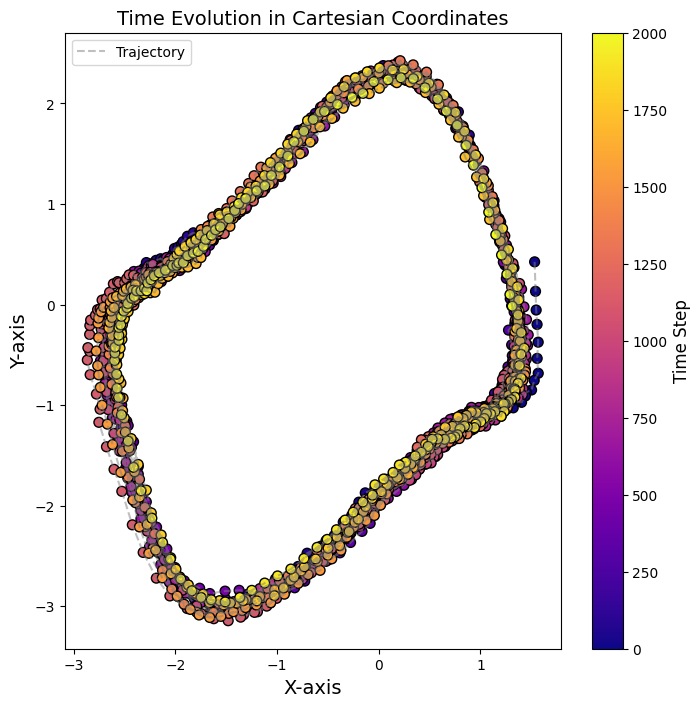

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Sample x, y time series data (Replace with actual data)
data = state_list  # Assuming x_y_data is in (x, y) format

x_values = [point[0] for point in data]
y_values = [point[1] for point in data]

time_steps = range(len(data))
colors = plt.cm.plasma([t / max(time_steps) for t in time_steps])  # Cooler to warmer colors

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot trajectory as a dashed line
ax.plot(x_values, y_values, color='gray', alpha=0.5, linestyle='--', label="Trajectory")

# Scatter plot of data points
scatter = ax.scatter(x_values, y_values, c=time_steps, cmap='plasma', edgecolor='k', s=50)

# Add a colorbar to indicate time evolution
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Time Step', fontsize=12)

# Set plot title and labels
ax.set_xlabel("X-axis", fontsize=14)
ax.set_ylabel("Y-axis", fontsize=14)
ax.set_title("Time Evolution in Cartesian Coordinates", fontsize=14)
ax.legend(loc="upper left")

plt.show()


In [33]:
class obs_model:
    def __init__(self,C,d,Qx):
        # self.noise_scale=noise_scale
        # self.Dx=Dx
        self.C=C
        self.d=d
        self.Qx = Qx
        self.density = conditional.ConditionalGaussianPDF(M=jnp.array([self.C]), b=jnp.array([self.d]), Sigma=jnp.array([self.Qx]))
    def compute_x_t(self,z_t):
        return np.matmul(self.C,z_t)+self.d+jnp.dot(jnp.linalg.cholesky(self.Qx), np.random.normal(size=((self.Qx).shape[0],)))
   
        

In [34]:
#Only paramter here is the obs_noise which is defined as follows!!
Dx=2
obs_noise=0.01
om=obs_model(C,d,Qx)


In [35]:
T=2000
obs_list=[]
state_lsit=[]
z_0=[1.5322986 , 0.42485871]
u_0=np.array([0])
x_0=om.compute_x_t(z_0)
obs_list.append(x_0)
state_list.append(z_0)

for i in range(T):
    z_t=state_list[-1]
    z_t_plus_1=sm.compute_z_t_plus_one(z_t,u_0)
    x__plus_1=om.compute_x_t(z_t_plus_1)
    obs_list.append(x__plus_1)
    state_list.append(z_t_plus_1)
    
    

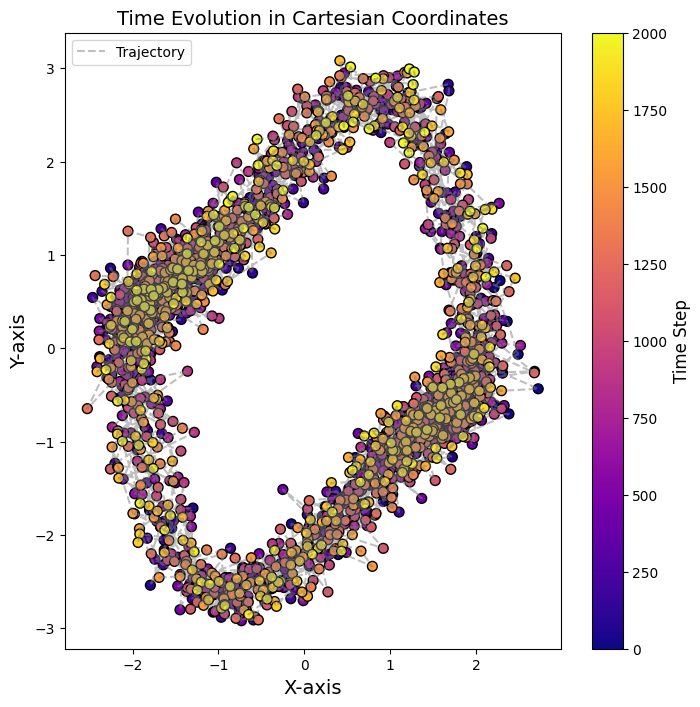

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Sample x, y time series data (Replace with actual data)
data = obs_list  # Assuming x_y_data is in (x, y) format

x_values = [point[0] for point in data]
y_values = [point[1] for point in data]

time_steps = range(len(data))
colors = plt.cm.plasma([t / max(time_steps) for t in time_steps])  # Cooler to warmer colors

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot trajectory as a dashed line
ax.plot(x_values, y_values, color='gray', alpha=0.5, linestyle='--', label="Trajectory")

# Scatter plot of data points
scatter = ax.scatter(x_values, y_values, c=time_steps, cmap='plasma', edgecolor='k', s=50)

# Add a colorbar to indicate time evolution
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Time Step', fontsize=12)

# Set plot title and labels
ax.set_xlabel("X-axis", fontsize=14)
ax.set_ylabel("Y-axis", fontsize=14)
ax.set_title("Time Evolution in Cartesian Coordinates", fontsize=14)
ax.legend(loc="upper left")

plt.show()


In [37]:

'''The version when we were working in radial coordinates'''

# #defining the preferred observations
# R=5
# sig_1=0.00000001
# sig_2=7

# mu_preferred = jnp.array([jnp.array([R,0])])
# sigma_preferred = jnp.array([jnp.array([[sig_1,0],[0,sig_2]])])

# preff_distri=pdf.GaussianPDF(Sigma=sigma_preferred,mu=mu_preferred)

'''the version with tan conversions, causing issues'''

# def preferred_distri(o_t,C,d):
#     R=6
#     # C_inv=np.linalg.inv(C)
#     # z_t=np.matmul(C_inv,o_t-d)
#     # theta=np.arctan(z_t[1]/z_t[0])
#     theta=np.arctan(o_t[1]/o_t[0])
    
    

   
    # mu_preferred=jnp.array([jnp.array([R*np.cos(theta),R*np.sin(theta)])])
#     # print(mu_preferred)
#     sigma_preferred = jnp.array([jnp.array([[0.001,0],[0,0.001]])])
#     preff_distri=pdf.GaussianPDF(Sigma=sigma_preferred,mu=mu_preferred)
#     return preff_distri,mu_preferred


'''The current version'''

def preferred_distri(o_t,C,d):
    R=3
      

   
    mu_preferred=jnp.array([jnp.array([R*o_t[0]/(np.sqrt(o_t[0]**2+o_t[1]**2)),R*o_t[1]/(np.sqrt(o_t[0]**2+o_t[1]**2))])])
    # print(mu_preferred)
    sigma_preferred = jnp.array([jnp.array([[0.001,0],[0,0.001]])])
    preff_distri=pdf.GaussianPDF(Sigma=sigma_preferred,mu=mu_preferred)
    return preff_distri,mu_preferred
    

    


In [38]:
state_density=sm.density
obs_density=om.density

In [39]:
#defining the prior state distribution p(s0)
Dz=2

prior_noise=0.1
mu=np.array([np.array([0,0])])

Sigma=jnp.array([prior_noise*jnp.eye(Dz)])
prior=pdf.GaussianPDF(Sigma=Sigma,mu=mu)



In [40]:
def compute_q_o_t_plus_one_given_u_t(prediction_density,obs_density):
    '''computes q(o_t+1|u_t) required to compute KL divergence term in the 
    EFE expression FOR A PARTICULAR TIME INSTANCE by integrating the observation
    density p(o_t+1|s_t+1) with the prediction density p(s_t+1|u_{1:t},o_{1:t})'''
    sigma_p_inv=np.linalg.inv(prediction_density.Sigma)
    sigma_o_inv=np.linalg.inv(obs_density.Sigma)
    sigma_o=obs_density.Sigma
    sigma_p=prediction_density.Sigma
    
    
    mu=prediction_density.mu
    
    sigma=np.matmul(sigma_o,np.matmul(sigma_o_inv+sigma_p_inv, sigma_p))
    q_o_t_plus_one_given_u_t=pdf.GaussianPDF(Sigma=sigma,mu=mu)
    return q_o_t_plus_one_given_u_t

    

In [41]:
def compute_KL_div_gaussian(gaussian_1,gaussian_2):
    mu_1=gaussian_1.mu[0]
    mu_2=gaussian_2.mu[0]
    sigma_1=gaussian_1.Sigma[0]
    sigma_2=gaussian_2.Sigma[0]
    return 0.5*(jnp.log(jnp.linalg.det(sigma_2)/jnp.linalg.det(sigma_1)) - 2 + jnp.trace(jnp.matmul(jnp.linalg.inv(sigma_2),sigma_1)) + jnp.matmul((mu_1-mu_2).T,jnp.matmul(jnp.linalg.inv(sigma_2),(mu_1-mu_2))))
        

In [42]:
def compute_expected_entropy(obs_density):
    # s_t=prediction.sample(num_samples=1,key=key)[0][0]
    # obs_density=om.compute_density(s_t)   
    n=obs_density.Dx
    det_sigma_obs=np.linalg.det(obs_density.Sigma)
    # print(det_sigma_obs)
    return (0.5*n)*np.log(2*np.pi) + 0.5*np.log(det_sigma_obs) - 0.5*n

    

In [43]:
def compute_G_next_step(prediction,obs_density,o_t):
    preff_distri,mu_preferred=preferred_distri(o_t,om.C,om.d)
    q_o_t_plus_one_given_u_t=compute_q_o_t_plus_one_given_u_t(prediction,obs_density)
    term_1=compute_KL_div_gaussian(q_o_t_plus_one_given_u_t,preff_distri)
    term_2=compute_expected_entropy(obs_density)
    return term_1 + term_2, mu_preferred

    
    

In [44]:
key = jax.random.PRNGKey(86)

In [45]:
#setting prediction initially as prior
T=200
prediction=prior
state_timeseries=[]
obs_timeseries=[]
filter_list=[]
prediction_list=[]
action_list=[]
prediction_list.append(prediction)

preferred_list=[]

for i in range(T+1):
    
    #to generate observations we sample s_t and o_t, not part of the agent performing active inference
    #ENVIRONMENT DYNAMICS
    #TODO:Need to make sepraete dynamcis for the internal model and the actual environment model seperately
    
    s_t=prediction.sample(num_samples=1,key=key)[0][0] #P(Zt|x1:t-1) P(Zt|Zt-1)

   
    o_t=om.compute_x_t(s_t)
    state_timeseries.append(s_t)
    obs_timeseries.append(o_t)
    sm.set_B_u(o_t,om.C,om.d)
    state_density=sm.density
    
    
    
    #AGENT DYNAMICS 
    #now the agent only has access to o_t, using this it performs estimation of G of the next step to perfomr decision making
    #at filter density computes
    p_s_given_o=obs_density.affine_conditional_transformation(prediction)
    filter=p_s_given_o.condition_on_x(np.array([o_t]))
    filter_list.append(filter)
    
    

    #made this line on 16/02/2025: We were not updating the state density with the new B_u before
 
    #now the filter density is used to estimate prediciton densities of s_t+1 for each of the possible actions +1 and -1.
    #This filter density aling with obs_density is passed onto the deifned compute_G_next_step function

    G_plus_one,_=compute_G_next_step((state_density.set_control_variable(np.array([np.array([+1])]))).affine_marginal_transformation(filter),obs_density,o_t)
    G_minus_one,mu_preferred=compute_G_next_step((state_density.set_control_variable(np.array([np.array([-1])]))).affine_marginal_transformation(filter),obs_density,o_t)
    preferred_list.append(mu_preferred[0])
    #The EFE values are compared and decision made
    
    if G_plus_one>G_minus_one:
        u_t=-1
    else:
        u_t=+1
    action_list.append(u_t)
   
    
    # the prediction density computed again for the chosen action and the iteration is continued, making decisions and computing predcition densties
    prediction=(state_density.set_control_variable(np.array([np.array([u_t])]))).affine_marginal_transformation(filter)
    prediction_list.append(prediction)
    
    
    
    
    
    

                


In [46]:
preferred_theta=[]
for i in preferred_list:
    preferred_theta.append(np.arctan((i[1]/i[0])))

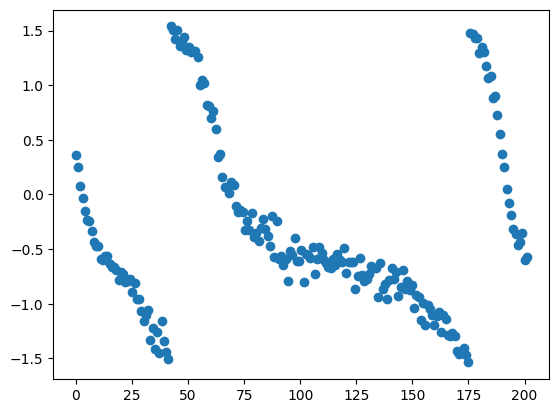

In [47]:
x=np.linspace(0,201,201)
y=preferred_theta
plt.scatter(x,y)
plt.show()
#-pi/2 to +pi/2 jump observed!!!!

In [48]:
# print(((state_density.set_control_variable(np.array([np.array([+1])]))).k_func).D)

# print((state_density.k_func).D)
# print('----------------------------------')


# print(np.shape((state_density.set_control_variable(np.array([np.array([+1])]))).W))
# print(np.shape(state_density.W))
# print('----------------------------------')

# print(state_density.Dx)
# print((state_density.set_control_variable(np.array([np.array([+1])]))).Dx)
# #once you set the control variable, the dimension is changing
# #dx of the state density changed after setting the control variable

In [49]:
state_estimated=[]
obs_estimated=[]

for i in range(T+1):
    filter=filter_list[i]
    key = jax.random.PRNGKey(86)

    s_t=filter.sample(num_samples=1,key=key)[0][0]#to ensure that the samples have shape(1,)
    state_estimated.append(s_t)
    o_t=om.compute_x_t(s_t)
    obs_estimated.append(o_t)
    
    
# print(state_estimated)

In [50]:
def generate_circle(radius, num_points=100):
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    return x, y

# Example usage


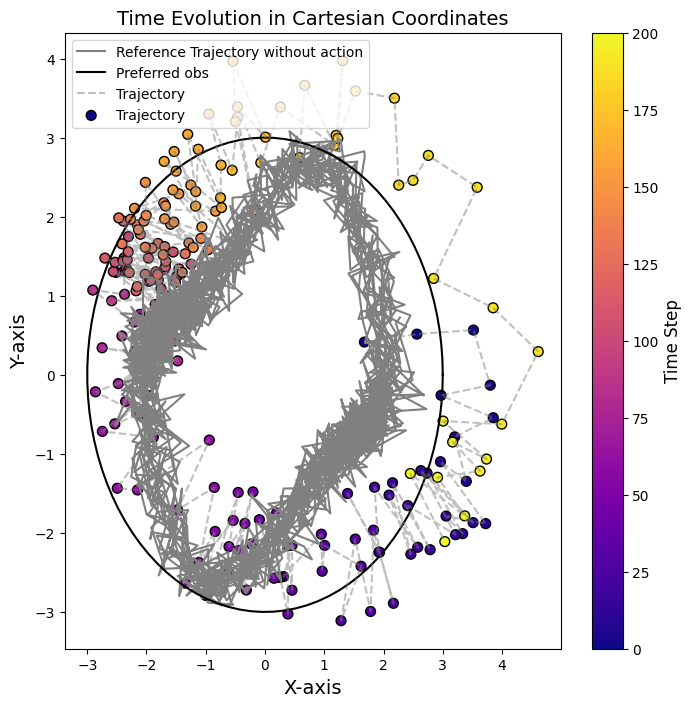

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Sample x, y time series data (Replace with actual data)
data_main = obs_estimated  # Primary trajectory data
data_ref =obs_list  # Reference trajectory data

# Extract x, y components for main time series
x_values_main = [point[0] for point in data_main]
y_values_main = [point[1] for point in data_main]

# Extract x, y components for reference trajectory
x_values_ref = [point[0] for point in data_ref]
y_values_ref = [point[1] for point in data_ref]



# Time steps for color mapping
time_steps = range(len(data_main))
colors = plt.cm.plasma([t / max(time_steps) for t in time_steps])  # Cooler to warmer colors

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the reference trajectory in black
ax.plot(x_values_ref, y_values_ref, color="gray", linewidth=1.5, linestyle="-", label="Reference Trajectory without action")

#plot circle 1 in red
x_circle_1,y_circle_1=generate_circle(3)
ax.plot(x_circle_1, y_circle_1, color="black", linewidth=1.5, linestyle="-", label="Preferred obs")

#plot circle 2 in blue
# x_circle_2,y_circle_2=generate_circle(2)
# ax.plot(x_circle_2, y_circle_2, color="blue", linewidth=1.5, linestyle="-", label="oscillator circle")


# Plot main trajectory as a dashed line
ax.plot(x_values_main, y_values_main, color="gray", alpha=0.5, linestyle="--", label="Trajectory")

# Scatter plot of main time series
scatter = ax.scatter(x_values_main, y_values_main, c=time_steps, cmap='plasma', edgecolor='k', s=50,label='Trajectory')




# Add a colorbar to indicate time evolution
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Time Step', fontsize=12)

# Set plot title and labels
ax.set_xlabel("X-axis", fontsize=14)
ax.set_ylabel("Y-axis", fontsize=14)
ax.set_title("Time Evolution in Cartesian Coordinates", fontsize=14)
ax.legend(loc="upper left")

plt.show()


In [52]:
print(om_tut.d)

[0.63521151 0.40150993]


Observations
---
If the preferred distribution is farther, the B value must be large enough to go against the flow. If large enough, there wont be any oscillatory behaviour but rather it would stay at a point at the right distance.

